In [ ]:
import time
import warnings
from itertools import cycle, islice

import matplotlib.pyplot as plt
import numpy as np

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

rng = np.random.RandomState(13)



---



# <font color='orange'> Data set </font>

In [ ]:
n_samples = 500
seed = 13

## <font color='orange'> Noisy circles data </font>

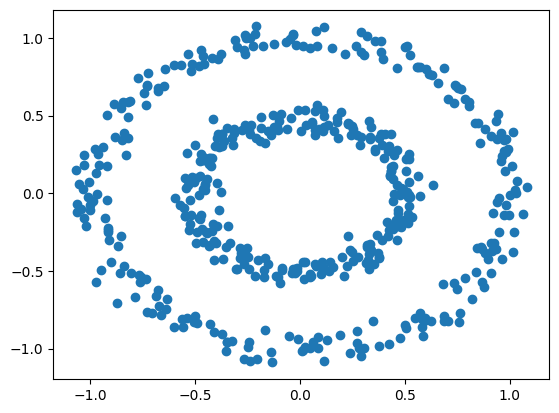

In [ ]:
# noisy circles
noisy_circles = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=seed
)
x, y = noisy_circles
plt.scatter(x[:,0], x[:,1])

## <font color='orange'> Blobs data </font>

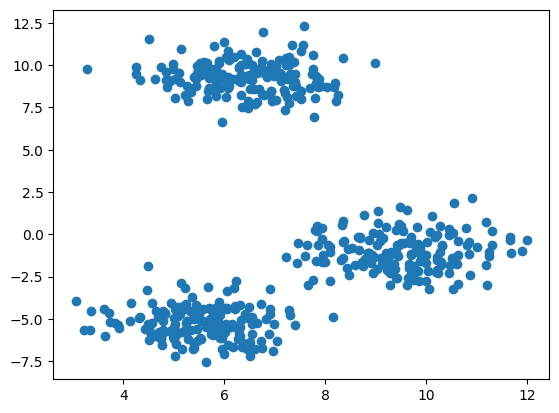

In [ ]:
# Blobs
blobs = datasets.make_blobs(n_samples=n_samples, random_state=seed)
x, y = blobs
plt.scatter(x[:,0], x[:,1])

## <font color='orange'> Moons data </font>

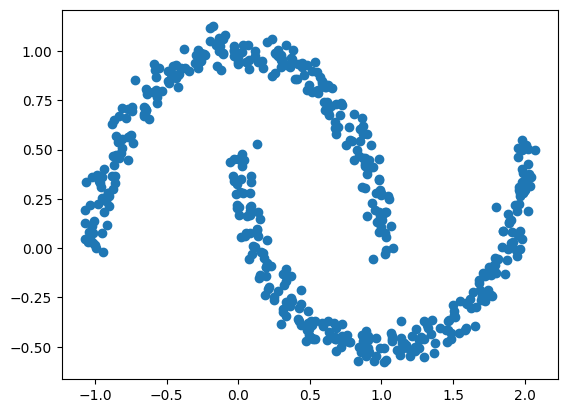

In [ ]:
# Moon shaped data
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05, random_state=seed)
x, y = noisy_moons
plt.scatter(x[:,0], x[:,1])

## <font color='orange'> Anisotropic data </font>

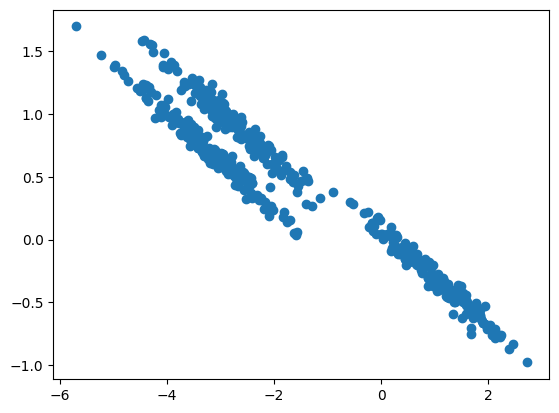

In [ ]:
# Anisotropicly distributed data
random_state = 170
Xan, yan = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.2], [-0.4, .2]]
X_aniso = np.dot(Xan, transformation)
aniso = (X_aniso, yan)
x, y = aniso
plt.scatter(x[:,0], x[:,1])

## <font color='orange'> Varied data </font>

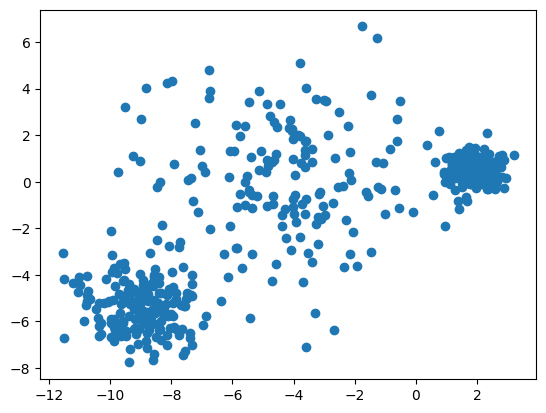

In [ ]:
# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)
x, y = varied
plt.scatter(x[:,0], x[:,1])



---



# <font color='orange'> Algorithms </font>

In [ ]:
colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(10),
                )
            )
        )

## <font color='orange'> K-means </font>

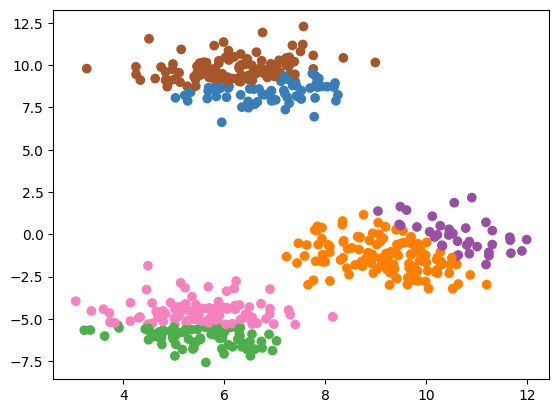

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = blobs #noisy_circles #blobs, noisy_moons, aniso, varied

# Hyper parameters
K= 6 # number of clusters. **Note: this parameter is obviously the most important so priotize changes to the other two.**
n_init = 1 # Number of different initial guesses.
tol = 100 # Tolerance - if the difference in the cluster centers of two consecutive iterations is less than tol, the algorithm declares convergence.

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])

## <font color='orange'> OPTICS </font>

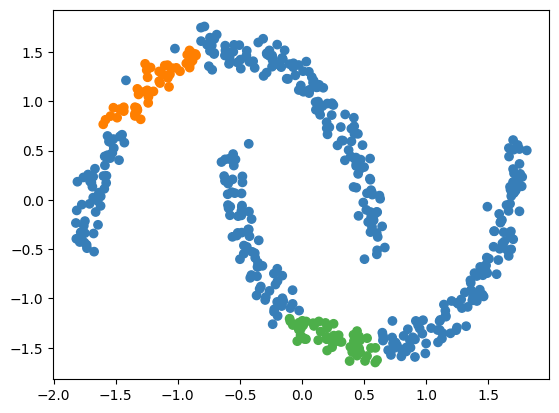

In [ ]:
# Documentation
# https://scikit-learn.org/dev/modules/generated/sklearn.cluster.OPTICS.html

# Select one data set
X, y = noisy_moons #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.05 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary
min_samples = 2 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)

# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



---



## <font color='orange'> Gaussian Mixture Model </font>

In [ ]:
'''
Covariance type
Full: means the components may independently adopt any position and shape.
Tied: means they have the same shape, but the shape may be anything.
Diagonal: means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.
Tied Diagonal: is a "tied" situation where the contour axes are oriented along the coordinate axes.
Spherical: is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).
'''

'\nCovariance type\nFull: means the components may independently adopt any position and shape.\nTied: means they have the same shape, but the shape may be anything.\nDiagonal: means the contour axes are oriented along the coordinate axes, but otherwise the eccentricities may vary between components.\nTied Diagonal: is a "tied" situation where the contour axes are oriented along the coordinate axes.\nSpherical: is a "diagonal" situation with circular contours (spherical in higher dimensions, whence the name).\n'

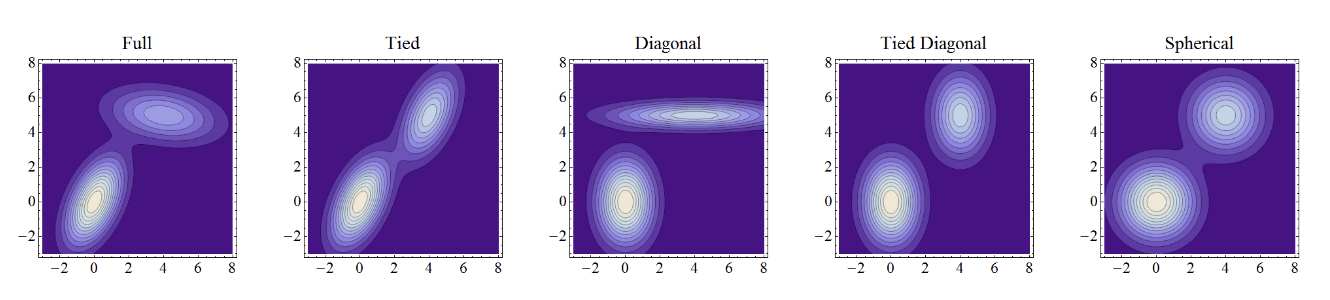

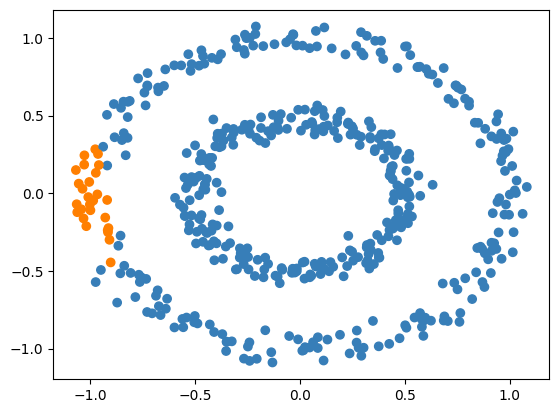

In [ ]:
# Documentation
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = noisy_circles #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 3 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.**
cov_type = 'full' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[1,1],[2,2],[3,3]] # The user-provided initial means - array-like of shape (n_components, n_features), default=None


# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

#plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



---



**General Expectation for Hyperparameters:**
In general,for K-Means and GMM, correctly setting the number of clusters (n_clusters or n_components) is crucial. I inspect scatter plots to estimate the number of clusters.  I also able to use Elbow method to find the best k.  Based on data visualization, I set initial positions (like mean_init in GMM) near dense regions becuase it also have effet on GMM performance (I think, instead of manually setting means_init, use the n_init parameter (e.g., n_init=10) to let the algorithm run multiple initializations and select the best result.)  

For OPTICS, parameters like min_samples and xi have significant impact. If clusters are expected to be dense, a higher min_samples might be appropriate. Xi influences how sensitively the algorithm detects changes in density (reachability plot). for data with small density changes, smaller Xi may be better.
  


## <font color='orange'> Solution for noisy circles data [5 points] </font>


**Before any calculation:**
K-means clustering has difficulty classifying data when clusters contain each other due to distance base identity. GMMs also have trouble to find cluster for concentric circles. Density base model like **OPTICS** is better by connecting dense regions.

<font color='orange'> K-means </font>

I expect kmeans has trouble to cluster noisy circles data. I will set **k = 2** since that i know that there are 2 circles in my data! Increasing **n_init** can help find a better overal solution. adjusting **tol** is unlikely to help with the fundamental issue of cluster shape.

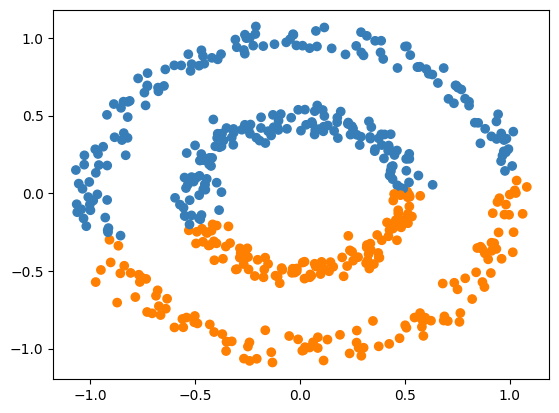

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = noisy_circles

# Hyper parameters
K = 2
n_init = 1
tol = 100

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])


K-means incorrectly partitions data into two clusters based on the Euclidean distance to the centroids. Adjusting n_clusters, n_init, or tol doesn't resolve this issue because K-Means cannot capture the non-convex cluster shapes.

<font color='orange'> OPTICS </font>

I expect OPTICS outperforms.  
xi : I will change this because it is the most imposrtant hyperparameters here (something around 0.5 due to gap between dense area).
min_samples: can affects cluster granularity. lower values make algorithm more sensetive to noise and outliers. higher values may lead to wrong clustering. I keep it 2.    
max_eps: setting this to large lets OPTICS find clusters based on data distribution.


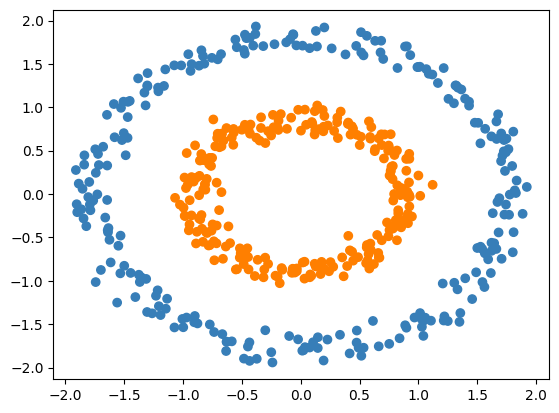

In [ ]:
# Select one data set
X, y = noisy_circles #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.5 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary #0.05
min_samples = 2 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)

# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

OPTICS successfully indentifies the clusters. It is suitable with circle shapes as I expected. OPTICS can define clusters as areas where data points are densely packed together, separated by areas of lower point density (noise or gaps).

<font color='orange'> Gaussian mixture </font>

GMM is more flexible than K-means. It can capture elliptical shape but still struggle with non-convex shape like concentric circles.  
K = 2  
cov_type = 'full' for maximum flexibilty
I also try to check different means_init but I believe it can not help!

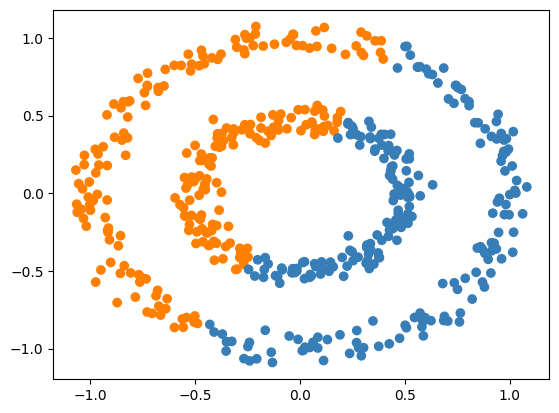

In [ ]:
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = noisy_circles #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 2 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.**
cov_type = 'full' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[0.5,0],[-0.5,0]]

# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



GMM does not correctly identify the cluster because it tends to partition data into two elliptical clusters, failing to separate the inner and outer circles perfectly.GMM assumes that data points are generated from Gaussian distributions which cannot model ring-shaped densities.



---



## <font color='orange'> Solution for blobs data [5 points] </font>

**Before any calculations:**  
Blobs data is 1.well-separated, 2.circular cluster of the 3.same size . I expect all algorithms can work well.

<font color='orange'> K-means </font>

K-means is well-suited for this dataset.
I will set k = 3 (I cheated based on the shape of data). this is the most critical parameter. However, I can use elbow methos (Or silhouette score) to estimate the optimal number of clusters. I will do this after clustering to make sure about k = 3.  
default is sufficient for other hyperparamets.

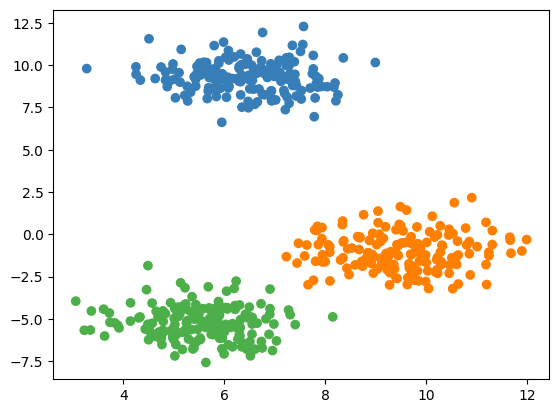

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = blobs #noisy_circles #blobs, noisy_moons, aniso, varied

# Hyper parameters
K= 3 # number of clusters. **Note: this parameter is obviously the most important so priotize changes to the other two.**
n_init = 1 # Number of different initial guesses.
tol = 10 # Tolerance - if the difference in the cluster centers of two consecutive iterations is less than tol, the algorithm declares convergence.

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])


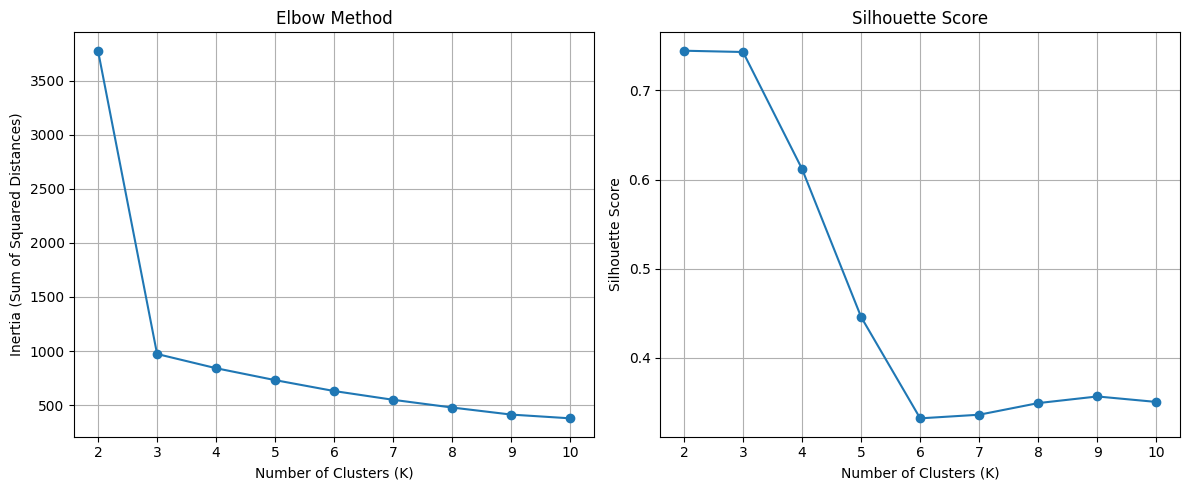

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# Select one data set
X, y = blobs  # noisy_circles, blobs, noisy_moons, aniso, varied

# Define range of k
K_range = range(2, 11)

# Lists to store evaluation metrics
inertia_values = []  #Elbow method
silhouette_scores = []  #Silhouette scores

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=0, n_init=10, tol=1e-4).fit(X)
    inertia_values.append(kmeans.inertia_)  # Sum of squared distances to cluster centers
    y_pred = kmeans.labels_
    silhouette_scores.append(silhouette_score(X, y_pred))  # Silhouette score

# Plot Elbow Method
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia_values, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid()

# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid()

plt.tight_layout()
plt.show()


Elbow method: K=3 is the best number of clusters. beyond this point, the reduction slows down significantly, suggesting that adding more clusters does not improve the fit.  
Silhouette score: the highest score is at 2, but k = 3 is still high. after 3, score drops sharply, confirming that k =3 is a good choice.


<font color='orange'> OPTICS </font>

xi is the most important parameter, affecting the sensitivity to changes in density. larger values may result in less clusters.
large value for xi (like 0.5 or larger) makes two bottom cluster become one group. I need to use a value between 0.25 and 0.5 to distinguish between them. I will plot the reachability plot to determine the optimal value for xi.

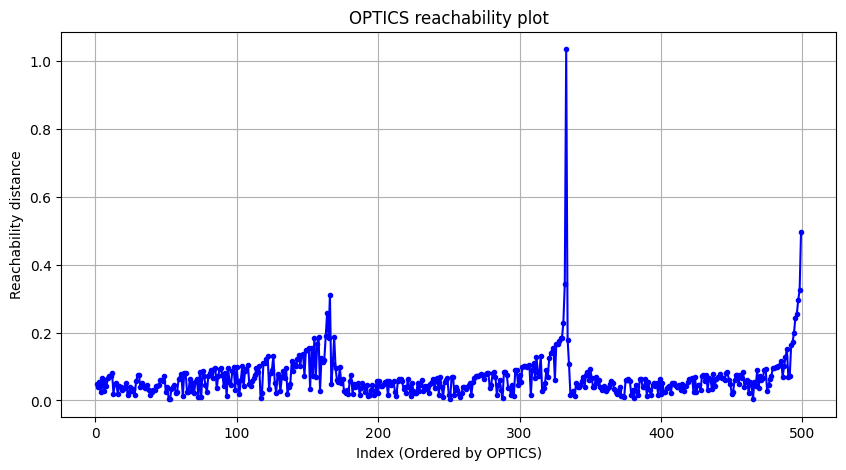

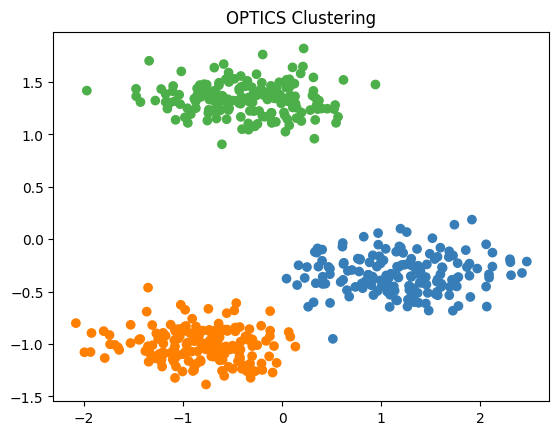

In [ ]:
# Select one data set
X, y = blobs #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.25 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary #change1
min_samples = 2 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)

##new:
# Plot Reachability Distance
plt.figure(figsize=(10, 5))
reachability = optics.reachability_[optics.ordering_]
plt.plot(np.arange(len(reachability)), reachability, color='blue', marker='.', linestyle='-')
plt.xlabel('Index (Ordered by OPTICS)')
plt.ylabel('Reachability distance')
plt.title('OPTICS reachability plot')
plt.grid()
plt.show()
######

# Plot
plt.figure()
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])
plt.title('OPTICS Clustering')
plt.show()

xi = 0.2 likely captures the sharp changes (steepness) in the reachability plot between clusters. It aligns with the steep peaks observed in the reachability plot. As you can see with this value OPTICS can predict well.

<font color='orange'> Gaussian mixture </font>

There isn't anything specific to highlight here. GMM works well as long as the number of components is chosen correctly.

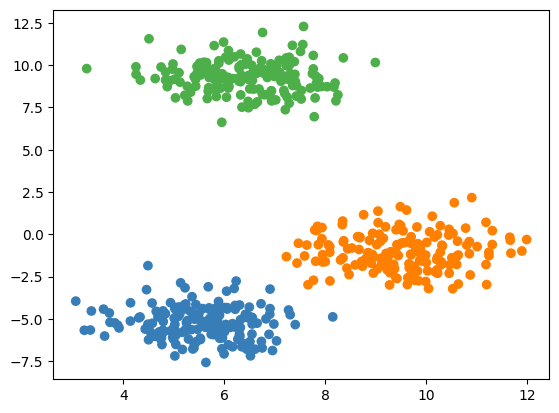

In [ ]:
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = blobs #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 3 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.**
cov_type = 'full' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’ #change1
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[1,1],[2,2],[3,3]] # The user-provided initial means - array-like of shape (n_components, n_features), default=None

# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])





---



## <font color='orange'> Solution for moons data [5 points] </font>

Before any calculation: K-means clustering has difficulty classifying data when clusters contain each other! due to distance base identity. Density base model like OPTICS is better by connecting dense regions (same situation: Circle data). GMM also has trouble to find best cluster for moon data bc it is hard to fit Guassian distribution to this pattern.

<font color='orange'> K-means </font>

Like circle data, I expect kmeans has trouble to cluster moons data. I will set **k = 2** since that i know that there are 2 moons in my data! Increasing **n_init** can help find a better overal solution but cannot overcome fundamental limitation of kmeans. adjusting **tol** is unlikely to help with the fundamental issue of cluster shape.

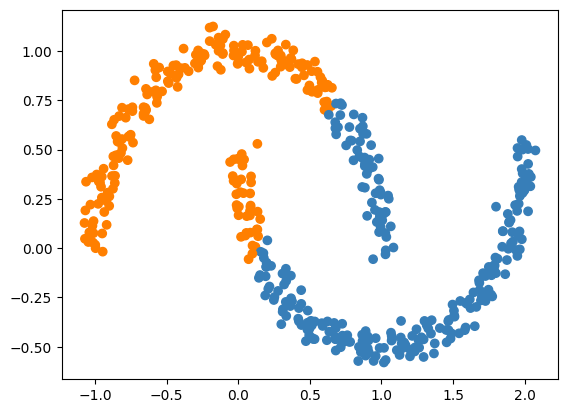

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = noisy_moons #noisy_circles #blobs, noisy_moons, aniso, varied

# Hyper parameters
K= 2 # number of clusters. **Note: this parameter is obviously the most important so priotize changes to the other two.**
n_init = 1 # Number of different initial guesses.
tol = 100 # Tolerance - if the difference in the cluster centers of two consecutive iterations is less than tol, the algorithm declares convergence.

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])


Adjusting n_clusters, n_init, or tol does not resolve this fundamental issue. Due to its reliance on Euclidean distance to centroid, Kmeans cannot capture the non-conves, interwined shaped of the moons.

<font color='orange'> OPTICS </font>

I expect OPTICS to perform well on moons dataset. I will play with xi to find the best solution. Based on reachability plot I think xi less than 0.6 would be great!

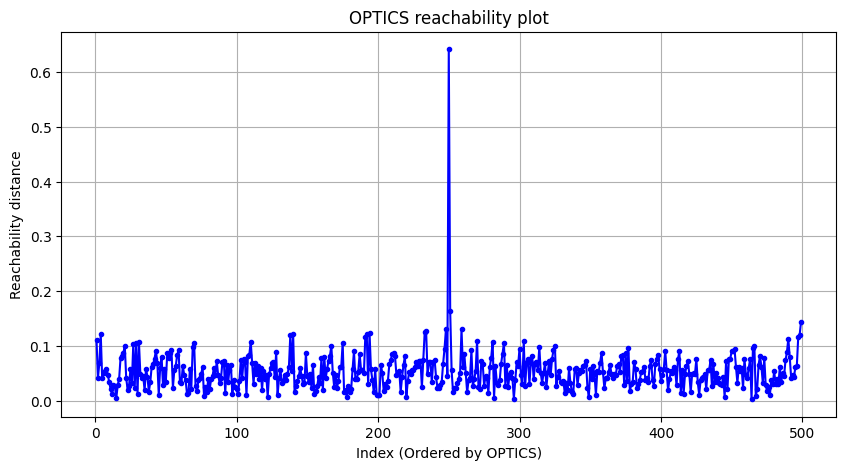

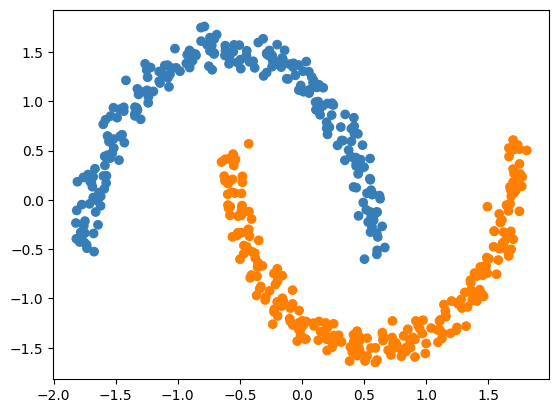

In [ ]:
# Select one data set
X, y = noisy_moons #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.6 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary #change1
min_samples = 2 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)
##new:
# Plot Reachability Distance
plt.figure(figsize=(10, 5))
reachability = optics.reachability_[optics.ordering_]
plt.plot(np.arange(len(reachability)), reachability, color='blue', marker='.', linestyle='-')
plt.xlabel('Index (Ordered by OPTICS)')
plt.ylabel('Reachability distance')
plt.title('OPTICS reachability plot')
plt.grid()
plt.show()
######
# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

OPTICS successfully separates the two moons into distinct clusters. The algorithm identifies the high-density regions corresponding to each moon.

<font color='orange'> Gaussian mixture </font>

n_components set to 2. "full" covariance has its own general covariance matrix for each component.

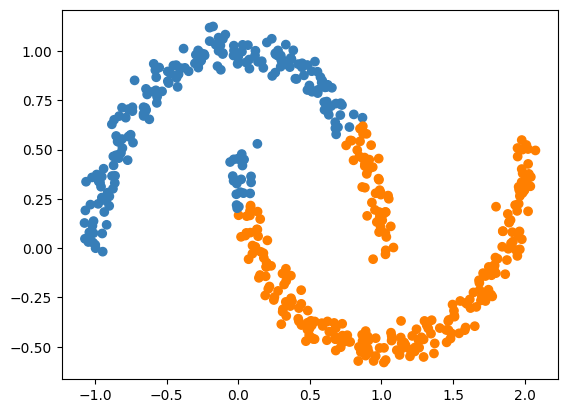

In [ ]:
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = noisy_moons #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 2 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.** #change1
cov_type = 'full' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’ #change1
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[0,1],[1,0]] # The user-provided initial means - array-like of shape (n_components, n_features), default=None #change2

# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



GMM assign nearby points from different moons to the same cluster due to overlapping Gaussian distribution. It does not correctly partition moon data.



---



## <font color='orange'> Solution for anisotropic data [5 points] </font>

Before any calculation:
This data is generated by applying a linear transformation to blobs, resulting in oriennted in various direction.
Anistropic data is not circular, thus, Kmean is not good choice. **GMM** can outperform because it considers the covariance between points, allowing for elliptical cluster shapes.

<font color='orange'> K-means </font>

k = 3   
I also will change tol and n-init to 10, trying to make a better result.

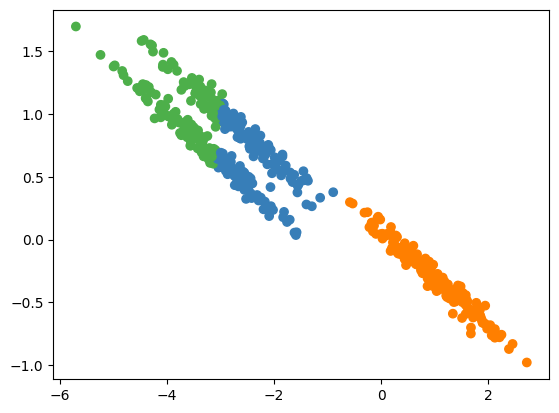

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = aniso #noisy_circles #blobs, noisy_moons, aniso, varied

# Hyper parameters
K= 3 # number of clusters. **Note: this parameter is obviously the most important so priotize changes to the other two.** #change1
n_init = 10 # Number of different initial guesses.
tol = 10 # Tolerance - if the difference in the cluster centers of two consecutive iterations is less than tol, the algorithm declares convergence.

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])


K-means incorrectly separates data because it cannot capture the covariance structure of the data.

<font color='orange'> OPTICS </font>

Anisotropic data has a significant density variation (clusters is not well separated in terms of density). I think OPTICS has struggle to classify Aniso data. I will change xi, min samples and min cluster size to make its performance better.

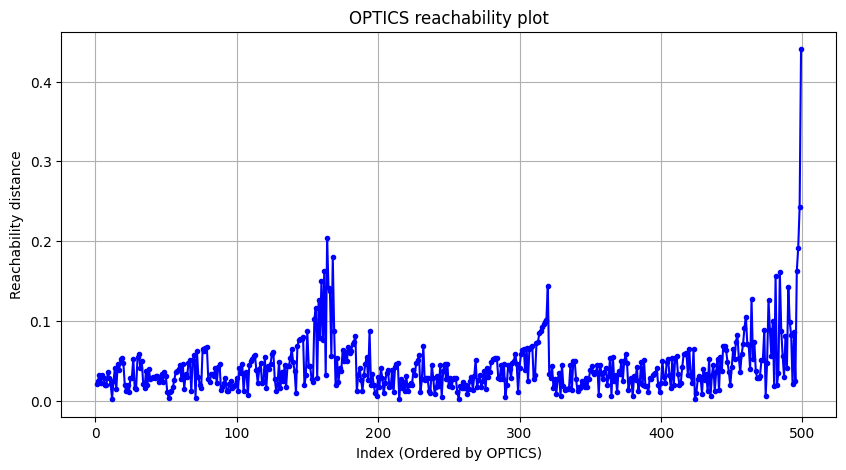

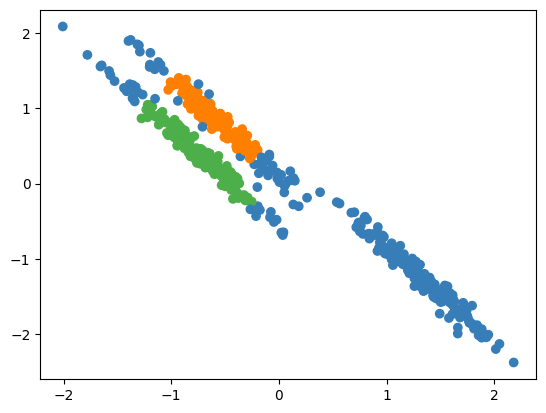

In [ ]:
# Select one data set
X, y = aniso #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.1 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary #change1
min_samples = 2 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)
##new:
# Plot Reachability Distance
plt.figure(figsize=(10, 5))
reachability = optics.reachability_[optics.ordering_]
plt.plot(np.arange(len(reachability)), reachability, color='blue', marker='.', linestyle='-')
plt.xlabel('Index (Ordered by OPTICS)')
plt.ylabel('Reachability distance')
plt.title('OPTICS reachability plot')
plt.grid()
plt.show()
######
# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

OPTICS does not correctly identify the clusters, potentially splitting clusters them based on density variations.

<font color='orange'> Gaussian mixture </font>

n_components = 3  
I will change cov_type to "tied" due to the shape of Aniso data. means_init is also changed based on the position of each cluster.

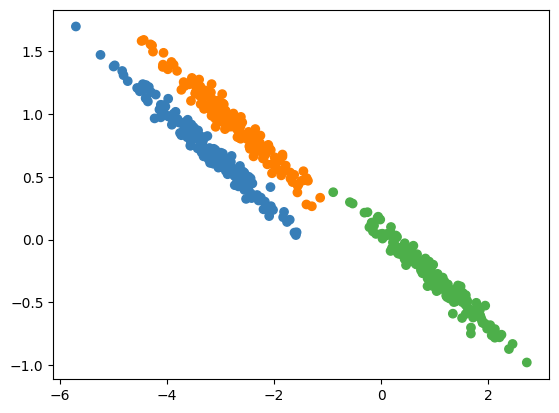

In [ ]:
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = aniso #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 3 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.** #change1
cov_type = 'tied' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’ #change1
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[-4,1],[-2,1],[0,0]] # The user-provided initial means - array-like of shape (n_components, n_features), default=None #change2
#means_init = [[1,1],[-2,2],[0,0]]
# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



GMM with full/tied covariance correctly identifies the cluster. I noticed that if initial means (menas_init) are too far from true clusters, the algorithm converge to something wrong cluster (maybe local minimum rather than global one).



---



## <font color='orange'> Solution for varied data [5 points] </font>

Befor any calculation:  
Varied data varies sizes and densities.Also, it is not well-separated so Kmeans does not work well with that.**GMM** can cluster it better than Kmeans. I expect OPTICS to perform well on the varied density data by correctly identifying clusters regardless of their size or density. It analyzes the reachability distances of data points to find clusters based on density ordering.

<font color='orange'> K-means </font>

Kmeans tends to produce clusters of similar sizes, which is not a good option for varied data.  
I will set k =3, increase n-init (to help avoid local solution)

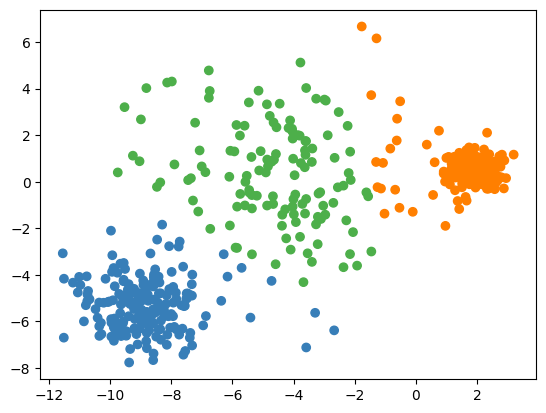

In [ ]:
from sklearn.cluster import KMeans

# Select one data set
X, y = varied #noisy_circles #blobs, noisy_moons, aniso, varied

# Hyper parameters
K= 3 # number of clusters. **Note: this parameter is obviously the most important so priotize changes to the other two.**
n_init = 5 # Number of different initial guesses.
tol = 10 # Tolerance - if the difference in the cluster centers of two consecutive iterations is less than tol, the algorithm declares convergence.

# Algorithm
kmeans = KMeans(n_clusters=K,
                random_state=0,
                n_init=n_init,
                tol = tol).fit(X)

# Predict clusters
y_pred = kmeans.predict(X)

# Plot
plt.scatter(X[:,0], X[:,1], color=colors[y_pred])


Kmeans works better than my expectation. However, in the middle place in green (sparse point), it cannot classify data perfectly.

<font color='orange'> OPTICS </font>

I will choose small value for xi to increase sensitivity to slight density changes.

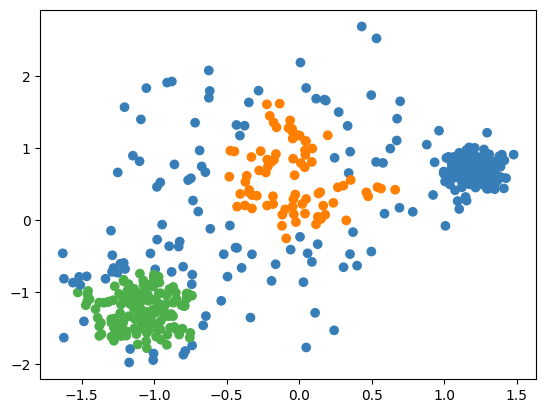

In [ ]:
# Select one data set
X, y = varied #noisy_circles, blobs, noisy_moons, aniso, varied

# normalize dataset for easier parameter selection
X = StandardScaler().fit_transform(X)

# Hyper parameters
xi = 0.05 # Determines the minimum steepness on the reachability plot that constitutes a cluster boundary #change1
min_samples = 5 # The number of samples in a neighborhood for a point to be considered as a core point
max_eps = 1000 # The maximum distance between two samples for one to be considered as in the neighborhood of the other
min_cluster_size = 0.1 # Minimum number of samples in an OPTICS cluster,
                     # expressed as an absolute number or a fraction of the number of samples
                     # (rounded to be at least 2). If None, the value of min_samples is used instead.

# Fit algorithm to data
optics = cluster.OPTICS(
        xi=xi,
        min_samples=min_samples,
        max_eps = max_eps,
        min_cluster_size=min_cluster_size,
    )

# Predict clusters
optics.fit(X)

# Find clusters
y_pred = optics.labels_.astype(int)

# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])

I changed xi, min_samples, and min cluster size but opposit to my expectation it cannot cluster varied data (it is worse than Kmeans).  
one reason can be:  
OPTICS relies on significant density differences to identify cluster boundaries. If the density contrast between clusters is not significant, OPTICS may struggle to distinguish them.  




<font color='orange'> Gaussian mixture </font>

GMM can model clusters with different covariances, accommodating the varied densities.

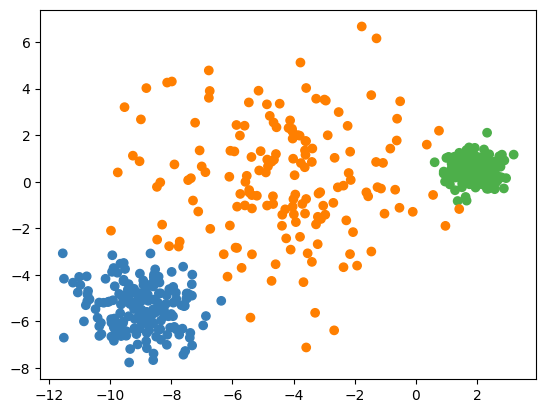

In [ ]:
from sklearn.mixture import GaussianMixture

# Select one data set
X, y = varied #blobs, noisy_moons, aniso, varied


# Hyper parameters
n_components = 3 # number of Gaussians **Note: this parameter is obviously the most important so priotize changes to the other two.** #change1
cov_type = 'full' # covariance type: 'full’, ‘tied’, ‘diag’, ‘spherical’, default=’full’ #change1
weights_init = [1/n_components] * n_components # The user-provided initial weights - array-like of shape (n_components, )
means_init = [[-9,0],[-4,0],[2,0]] # The user-provided initial means - array-like of shape (n_components, n_features), default=None #change2

# Fit algorithm to data
gm = GaussianMixture(n_components=n_components,
                     covariance_type=cov_type,
                     weights_init=weights_init,
                     means_init=means_init,
                     random_state=0).fit(X)


# Predict clusters
y_pred = gm.predict(X) # returns a label k {1...n_components-1}

# Predict probability of being in each Gaussian
y_pred_proba = gm.predict_proba(X) # returns n_components values for each sample, value k is the probability that the sample is from Gaussian k


# Plot
plt.scatter(X[:, 0], X[:, 1], color=colors[y_pred])



GMM perfectly identifies all clusters in the varied density data



---



---

